In [1]:
import os
import pdb
import argparse
import numpy as np
import tensorflow as tf
from scipy.stats import pearsonr
from tensorflow.keras import backend as K
from model.model_fn import build_compile_model_pred

/mnt/gs/home/uranc/anaconda3/envs/tfGPU/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/mnt/gs/home/uranc/anaconda3/envs/tfGPU/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/mnt/gs/home/uranc/anaconda3/envs/tfGPU/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/mnt/gs/home/uranc/anaconda3/en

In [2]:
from skimage.io import imshow
import matplotlib.pyplot as plt

In [3]:
# params
params = {'weight_dir': 'weights.last.h5', 'lr': 1.56*1e-4,
          'p_content': 0, 'p_style': 0, 'p_hole': 0, 'p_tv': 0,
          'p_fft_s': 0.002, 'p_fft_c': 8.79,  # 'p_fft_s': 0.330, 'p_fft_c': 505.47,
          'p_fft_abs': 1, 'p_fft_log': 0.026, 'p_fft_phase': 6.45e-05,  # .0556
          'b_size': 4, 'current_epoch': 0,
          'n_epoch': 150000,
          'exp_dir': 'experiments/',
          'inst_norm': False,
          'input_size': 224
          }

#INPUT_NAME = 'examples/samples_im.png'
INPUT_NAME = 'examples/samples_nat_im.npy'
WEIGHT_DIR = 'weights.last.h5'
BATCH_SIZE = 64


In [4]:
# input
out_name, file_ext = os.path.splitext(INPUT_NAME)

# model
model = build_compile_model_pred(params)
model.summary()

# modelname
flag_numpy = 1 if file_ext=='.npy' else 0

if flag_numpy:
    this_input = np.transpose(np.load(input_name), (3, 0, 1, 2))
    test_steps = 1
else:
    from skimage.io import imread
    from skimage.transform import resize
    img = imread(input_name)
    this_input = np.expand_dims(img, axis=0)
    test_steps = 1

# resize image to 84x84
img = resize(img, (84, 84, 3), anti_aliasing=True)
pred = model.predict(np.expand_dims(img, axis=0), steps=1)
print(pred[0][0])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
loading model


AttributeError: 'dict' object has no attribute 'endswith'

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


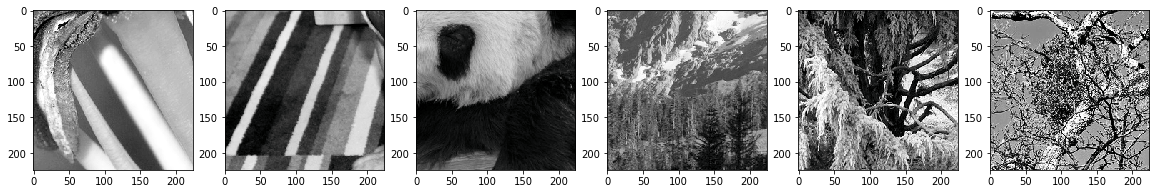

In [28]:
plt.figure(figsize=(20,10))
for ii in range(NO_INPUT):
    plt.subplot(1,6,ii+1)
    plt.imshow(this_input[ii,:,:,:]/255)
    

In [14]:
predictability

array([0.90124065, 0.90991879, 0.8956998 , 0.90440947, 0.79521441,
       0.76134574])